<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/OSI-SAF_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_?_link_to_prev_notebook.ipynb" target="_blank"><< PREV NOTEBOOK</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_?_link_to_next_notebook.ipynb" target="_blank">NEXT NOTEBOOK >></a>

<font color="#138D75">**EUMETSAT OSI SAF Training Service**</font> <br>
**Copyright:** 2022 EUMETSAT <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h3>Learn OSI SAF sea ice parameters : Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
This notebook has the following prerequisites:
- **COMPLETE WITH ANY PRE-REQUISITES (e.g. account access), IF ANY**

There are no prerequisite notebooks for this module.
- **COMPLETE WITH ANY PRE-REQUISITE NOTEBOOKS, IF ANY**
    
</div>
<hr>

# 1.3c Map - Sea Ice Type - Downloaded from OSI SAF HL FTP
### Data used 

| Product Description | Product Navigator | OSI SAF website link | OSI SAF Identifier |
|:--------------------:|:-------------:|:-----------------:|:-----------------:|



### Learning outcomes

At the end of this notebook you will know;
* How to open Sea Ice Type netcdf
* Map Sea Ice Type using cartopy 

### Outline 

...

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>

 1. [Mapping sea ice type - Northern Hemisphere](#section1)
 1. [Mapping sea ice type - Southern Hemisphere](#section2)

<hr>

In [1]:
# library imports 

from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import ssl
import os
import cmocean
import cmcrameri
import warnings
ssl._create_default_https_context = ssl._create_unverified_context

warnings.filterwarnings('ignore')

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Mapping sea ice type - Northern Hemisphere
[Back to top](#TOC_TOP)

</div>

This first section allows to set the geographical area

In [2]:
# setting geographical area
lon_min = 5
lon_max = 175
lat_min = 40
lat_max = 90

Setting directory where to read data files

In [3]:
directory = 'data/sea_ice_type/nh/'

Choosing color palet

In [4]:
#cmap = cmocean.cm.ice
cmap = cmcrameri.cm.oslo

Mapping figure based on retrieved netcdf file

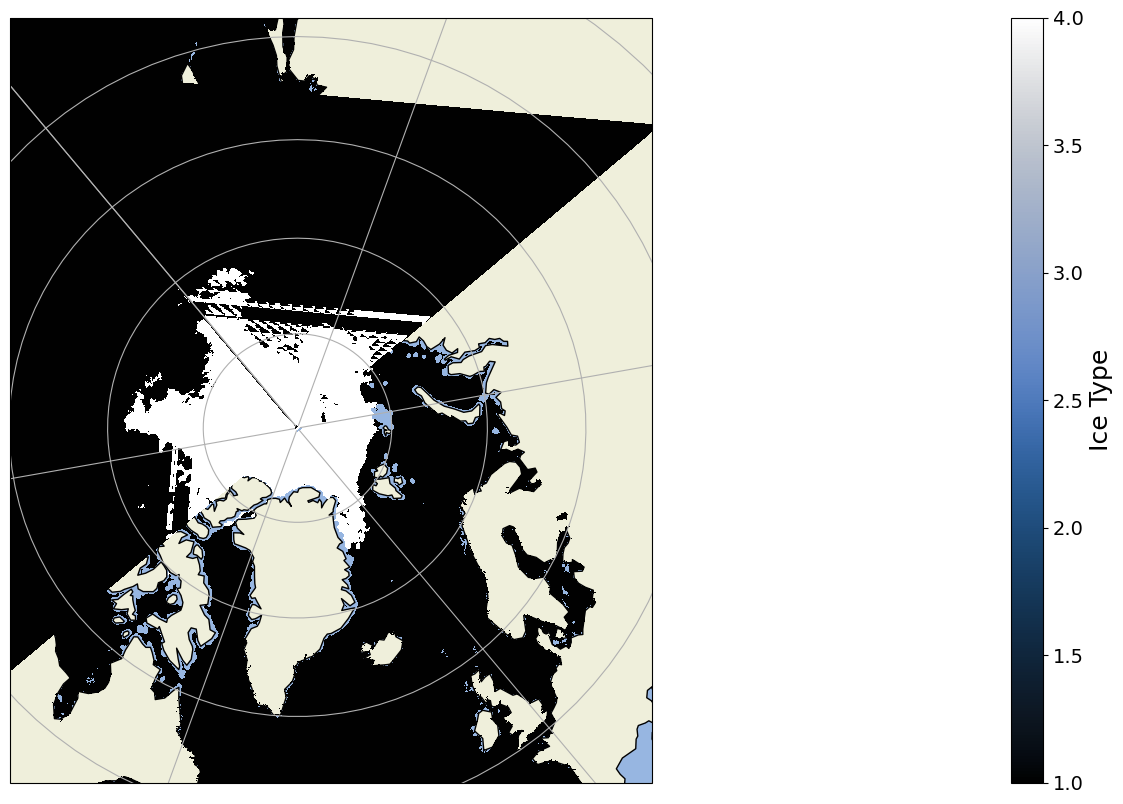

In [5]:
fig = plt.figure(figsize=(16,9))

projection=ccrs.NorthPolarStereo(-40)

ax = plt.axes([0.05,0.05,0.75,0.85], projection=projection)
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')
ax.gridlines()

for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        nc = NetCDFFile(directory + '/' + filename)
        xc = nc.variables['xc'][:] 
        yc = nc.variables['yc'][:] 
        lat = nc.variables['lat'][:]   
        lon = nc.variables['lon'][:]
        ice_type = nc.variables['ice_type'][:]
        status_flag  = nc.variables['status_flag'][:]
        nc.close()
        im = plt.pcolormesh(lon, lat, ice_type[0,:,:], transform=ccrs.PlateCarree(), cmap=cmap)

axc = fig.add_axes((0.85,0.05,0.02,0.85))
cb = plt.colorbar(im, orientation='vertical', cax=axc)
cb.set_label('Ice Type', fontsize=18)
cb.ax.tick_params(labelsize=14)

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Mapping sea ice type - Southern Hemisphere
[Back to top](#TOC_TOP)

</div>

In [6]:
# setting geographical area
lon_min = -40
lon_max = 140
lat_min = -35
lat_max = -90

In [7]:
directory = 'data/sea_ice_type/sh/'

In [8]:
#cmap = cmocean.cm.ice
cmap = cmcrameri.cm.oslo

In [9]:
ice_shelves = cfeature.NaturalEarthFeature(
        category='physical',
        name='antarctic_ice_shelves_polys',
        scale='10m',
        facecolor='grey',
        edgecolor='grey')

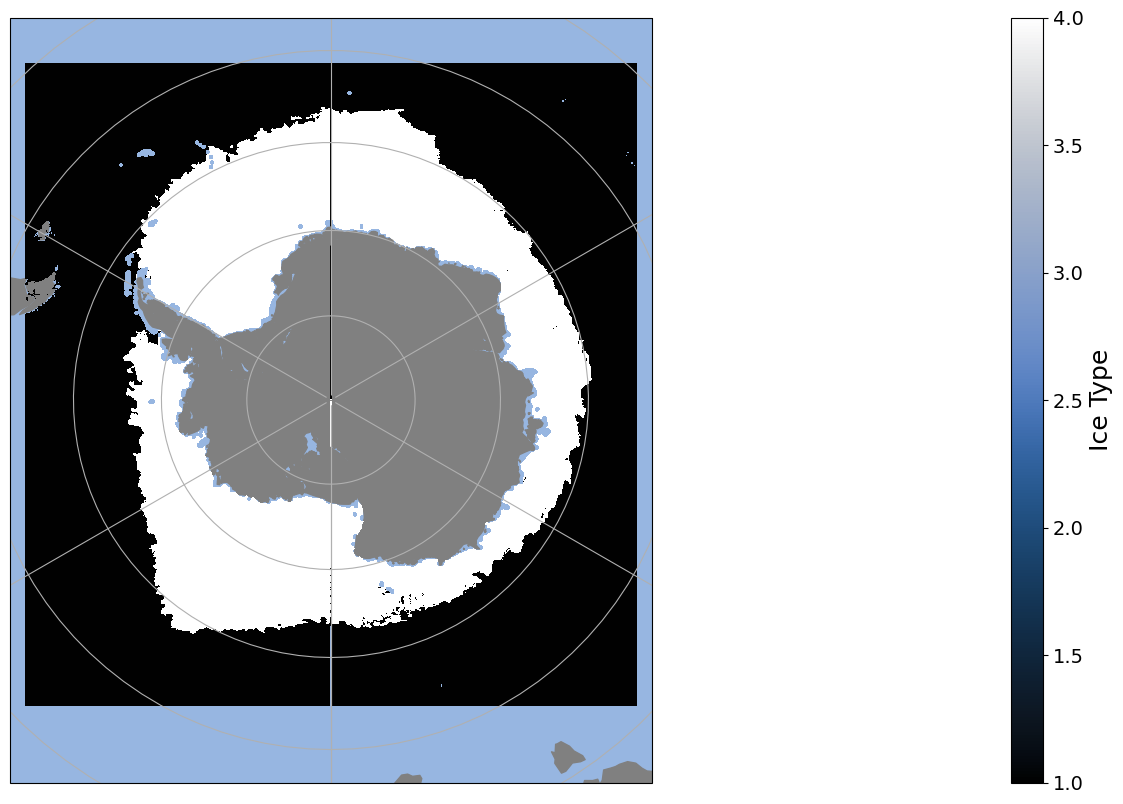

In [10]:
fig = plt.figure(figsize=(16,9))

projection=ccrs.SouthPolarStereo()

ax = plt.axes([0.05,0.05,0.75,0.85], projection=projection)
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, zorder=0, color='grey')
ax.add_feature(ice_shelves, )

ax.gridlines()

for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        nc = NetCDFFile(directory + '/' + filename)
        xc = nc.variables['xc'][:] 
        yc = nc.variables['yc'][:] 
        lat = nc.variables['lat'][:]   
        lon = nc.variables['lon'][:]
        ice_type = nc.variables['ice_type'][:]
        status_flag  = nc.variables['status_flag'][:]
        nc.close()
        im = plt.pcolormesh(lon, lat, ice_type[0,:,:], transform=ccrs.PlateCarree(), cmap=cmap)

axc = fig.add_axes((0.85,0.05,0.02,0.85))
cb = plt.colorbar(im, orientation='vertical', cax=axc)
cb.set_label('Ice Type', fontsize=18)
cb.ax.tick_params(labelsize=14)

<hr>
<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_?_link_to_prev_notebook.ipynb" target="_blank"><< PREV NOTEBOOK</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./1_?_link_to_next_notebook.ipynb" target="_blank">NEXT NOTEBOOK >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>